In [13]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [84]:
env = gym.make('Acrobot-v1')
env.reset()

array([ 0.99795116, -0.06398037,  0.99637621, -0.08505553, -0.00297855,
       -0.03253398])

In [5]:
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())
    
env.close()

# Action and State 

Reinforcement Learning will learn a mapping of states to the optimal action to perform in that state by exploration, i.e. the agent explores the environment and takes actions based off rewards defined in the environment. [source](https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/)

- **Action**, input provided by the agent to the environment   
Here, left, nothing or right represented as +1, 0 or -1)  
  
  
- **State**, numeric representation of what the agent is observing at a particular time in the environment  
Here, the state consists of the sin() and cos() of the two rotational joint angles and the joint angular velocities : [cos(theta1) sin(theta1) cos(theta2) sin(theta2) thetaDot1 thetaDot2]. For the first link, an angle of 0 corresponds to the link pointing downwards. The angle of the second link is relative to the angle of the first link. An angle of 0 corresponds to having the same angle between the two links. A state of [1, 0, 1, 0, ..., ...] means that both links point downwards.

In [20]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space (number of input possibility by agent user) {}".format(env.action_space))  
print("State Space (encoding of the curent state to be mapped) {}".format(env.observation_space))

Action Space (number of input possibility bu agent user) Discrete(3)
State Space (encoding of the curent state to be mapped) Box(6,)


--> State Space is a tensor, hence it will need to be solved with a CNN solution

In [82]:
from gym import spaces
space = spaces.Discrete(6) # Set with 6 elements {0, 1, 2, 3, 4, 5}
x = space.sample()
assert space.contains(x)
assert space.n == 6

In [86]:
env.close()

In [111]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 500
Penalties incurred: 0


In [124]:
env.close()

In [116]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

Timestep: 500
State: [ 0.89834736  0.43928581  0.11854192 -0.99294905 -2.32170177  0.74340652]
Action: 1
Reward: -1.0


# Q-learning

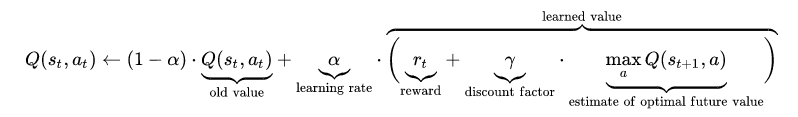

To define the maximum expected cumulative award for given pair with hyperparameters : 
- learning rate 
- discount factor

The Q learning equation maps state-action pairs to a maximum with combination of immediate reward plus future rewards i.e. for new states learned value is reward plus future estimate of rewards.

In [122]:
import numpy as np
q_table = np.zeros([env.observation_space.low.shape[0], env.action_space.n])

In [131]:

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            print(q_table ,state)
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [ 0.99999139  0.00414943  0.99934852 -0.0360908  -0.06053088  0.02326604]


IndexError: arrays used as indices must be of integer (or boolean) type